In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from demo.lib import DB
from demo import SeedZoneObserver, CoordGenerator
from IPython.display import clear_output

# Demo2. 우체통 지도

## Observe SeedZone Database

In [2]:
SeedZoneObserver.observe()

285

## SeedZone Run

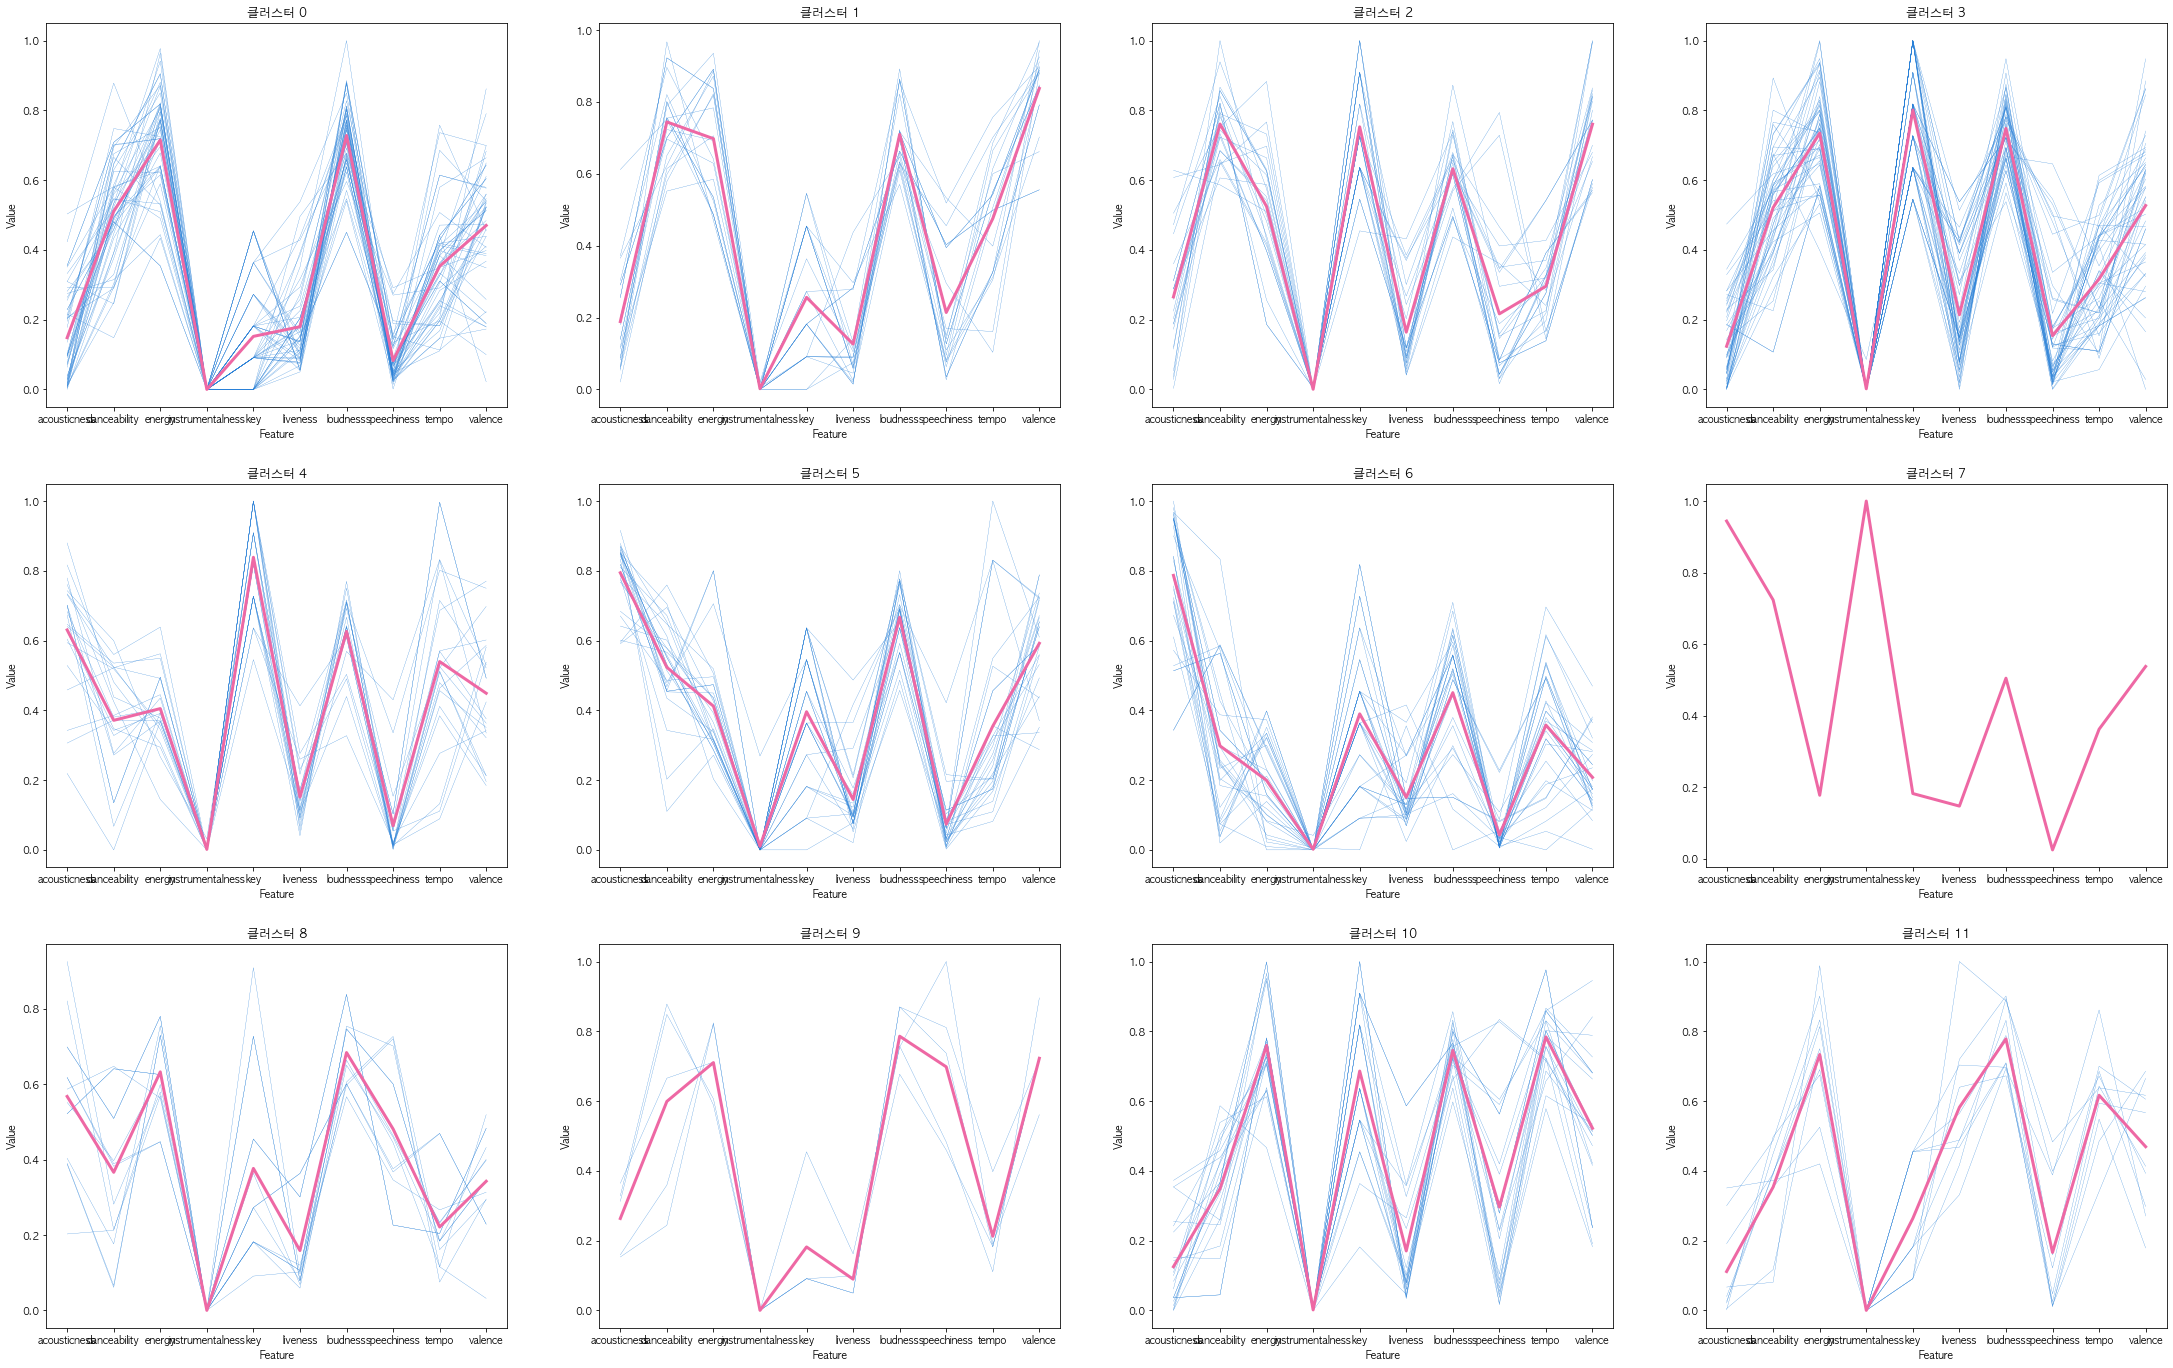

In [3]:
observer = SeedZoneObserver()
observer.run()

clear_output(wait=True)
observer.kmeans.draw_cluster()

## CoordGenerator

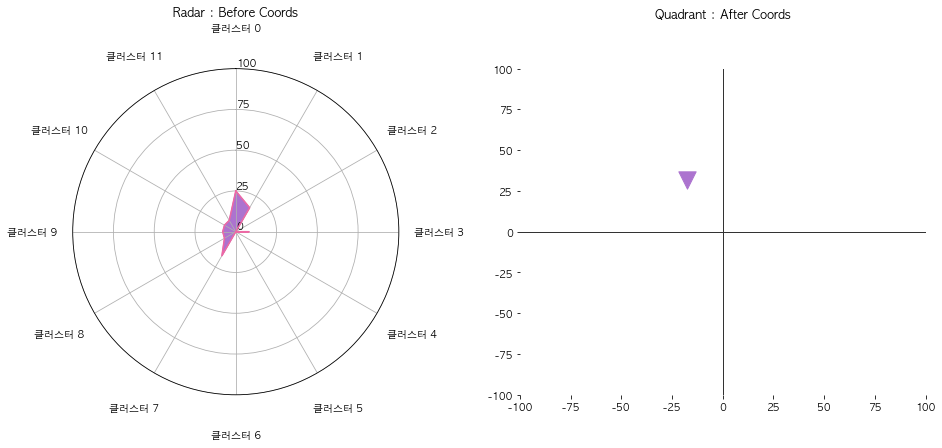

In [183]:
gen = CoordGenerator("62908d70c1caa51c93e508d3")

gen.make_coords()
gen.draw_coord()

In [136]:
result = CoordGenerator.all_make_coords_2()

In [135]:
result

In [137]:
db = DB()

mailboxes = [_ for _ in db.mailbox.find()]
ran_mailboxes = np.random.choice(np.arange(len(result)), 8)

K = db.cluster_zone.find().sort("version", -1)[0]['K']

In [138]:
ran_mailboxes

array([32,  2,  4,  8, 12,  6, 37, 39])

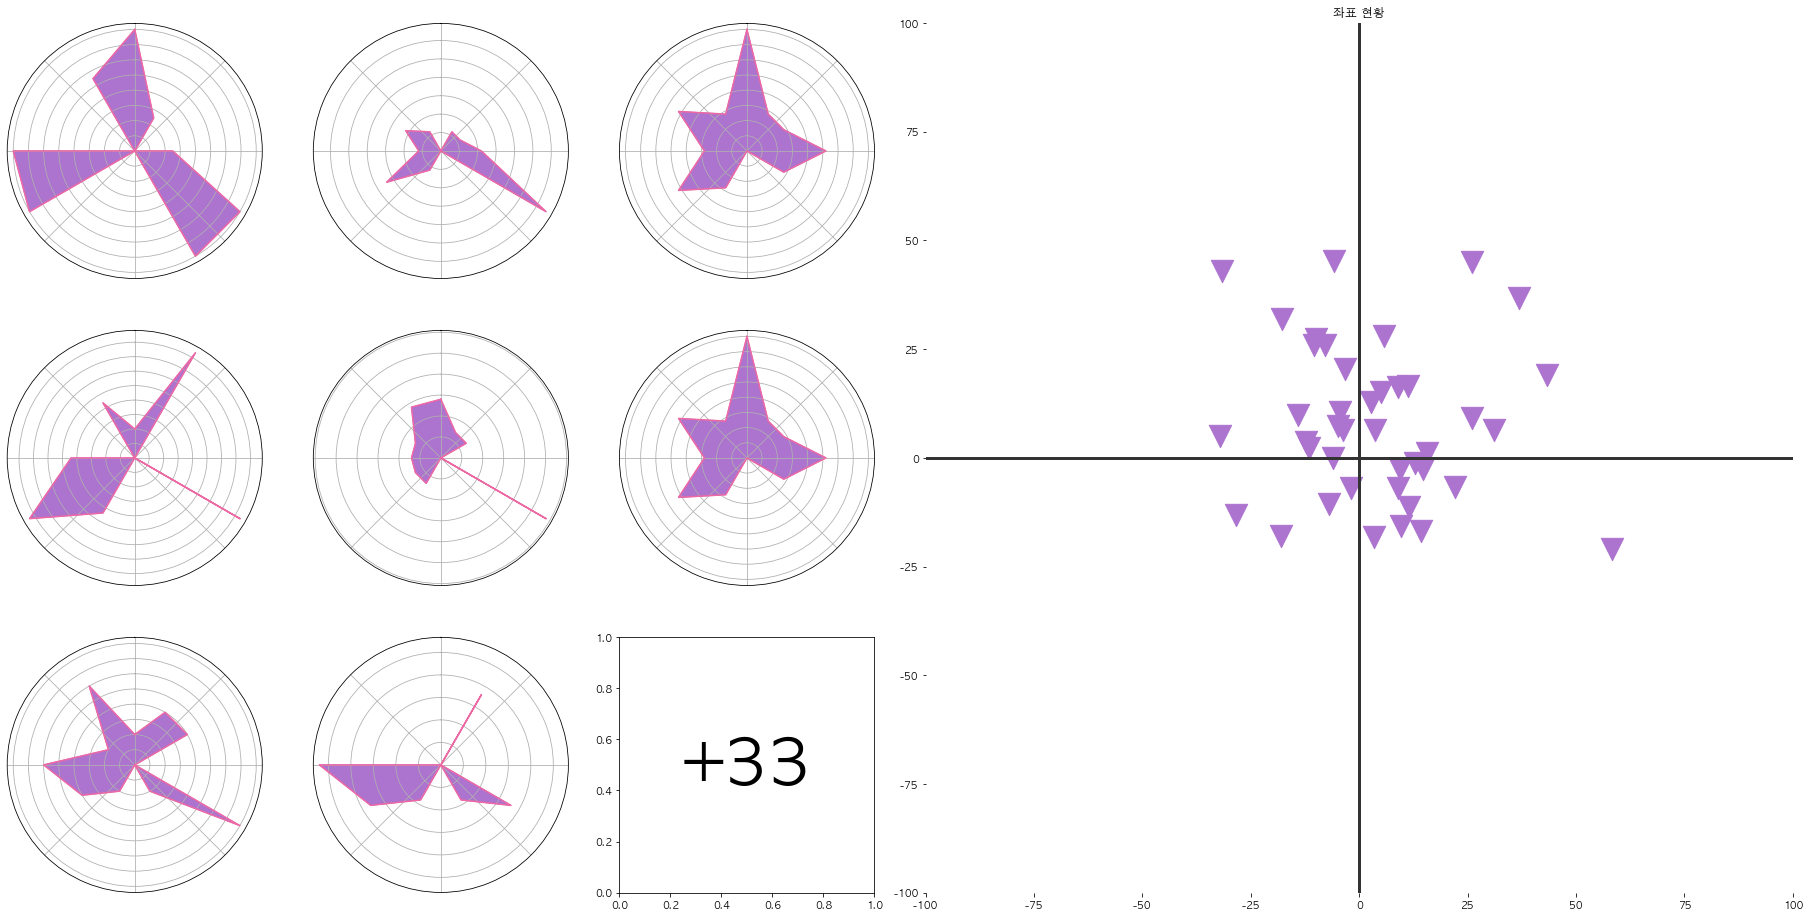

In [182]:
ran_mailboxes = np.random.choice(np.arange(len(result)), 8)

num_labels = K
angles = [x/float(num_labels)*(2*pi)
                  for x in range(num_labels)]
angles += angles[:1]

matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure(figsize=(32,16))

for idx,left_idx in enumerate(range(1, 16, 6)):
    for _idx, radar_idx in enumerate(range(left_idx, left_idx + 3)):
        
        if radar_idx == 15:
            ax = plt.subplot(3,6,radar_idx)
            ax.text(0.5, 0.5, "+{}".format(len(mailboxes) - len(ran_mailboxes)),
                   fontsize=64,
                    va='center',
                    ha='center',
                    transform=ax.transAxes
                   )
        else:
            ran_idx = ran_mailboxes[(idx * 3) + _idx]
            ax = plt.subplot(3,6,radar_idx, polar=True)
            ax.set_theta_offset(pi / 2)
            ax.set_theta_direction(-1)
            ax.set_xticklabels('')
            ax.set_yticklabels('')
            ax.set_rlabel_position(0)
            
            ax.plot(angles, np.append(result[ran_idx][0], result[ran_idx][0][0])  , color="#EE68A4")
            ax.fill(angles, np.append(result[ran_idx][0], result[ran_idx][0][0])  , color="#AC73CF")

points = np.array([])
for _res in result:
    points = np.append(points,[_res[1]['x'],_res[1]['y']])
points = points.reshape(-1, 2)

gs = fig.add_gridspec(3,6)
ax = fig.add_subplot(gs[:, 3:6])

ax.axvline(0, color="#333", linewidth=3)
ax.axhline(0, color="#333", linewidth=3)

ax.scatter(points[:, 0], points[:, 1], color='#AC73CF', s=500, marker='v')

plt.ylim(-100, 100)
plt.xlim(-100, 100)
    
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_title("좌표 현황")
        
plt.show()